In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/survey_results_public.csv")

In [2]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [5]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 1 to 1772
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       948 non-null    object 
 1   EdLevel       948 non-null    object 
 2   YearsCodePro  943 non-null    object 
 3   Employment    948 non-null    object 
 4   Salary        948 non-null    float64
dtypes: float64(1), object(4)
memory usage: 44.4+ KB


In [7]:
df = df.dropna()
df.isnull().sum()

,0
Country,0
EdLevel,0
YearsCodePro,0
Employment,0
Salary,0


In [8]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 1 to 1772
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       761 non-null    object 
 1   EdLevel       761 non-null    object 
 2   YearsCodePro  761 non-null    object 
 3   Salary        761 non-null    float64
dtypes: float64(1), object(3)
memory usage: 29.7+ KB


In [10]:
df['Country'].value_counts()

,count
Country,
United States of America,140
Germany,119
United Kingdom of Great Britain and Northern Ireland,43
India,34
Italy,33
Canada,32
Netherlands,28
Brazil,22
France,21


In [11]:
def shorten_categories(categories, cutoff):
  categorical_map = {}
  for i in range(len (categories)):
    if categories.values[i] >= cutoff:
      categorical_map[categories.index[i]] = categories.index[i]
    else:
      categorical_map[categories.index[i]] ='Other'
  return categorical_map

In [14]:
country_map = shorten_categories(df.Country.value_counts(),5)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

,count
Country,
United States of America,140
Germany,119
Other,85
United Kingdom of Great Britain and Northern Ireland,43
India,34
Italy,33
Canada,32
Netherlands,28
Brazil,22


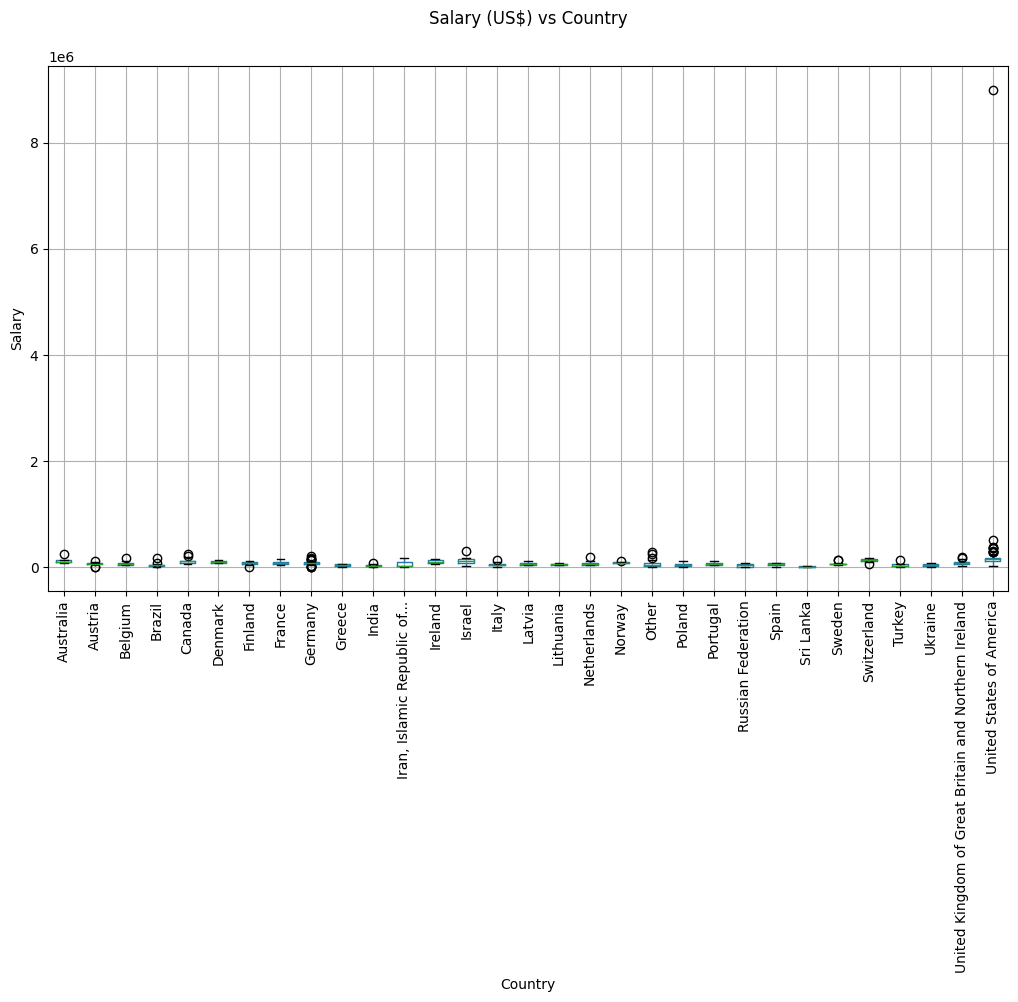

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [16]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

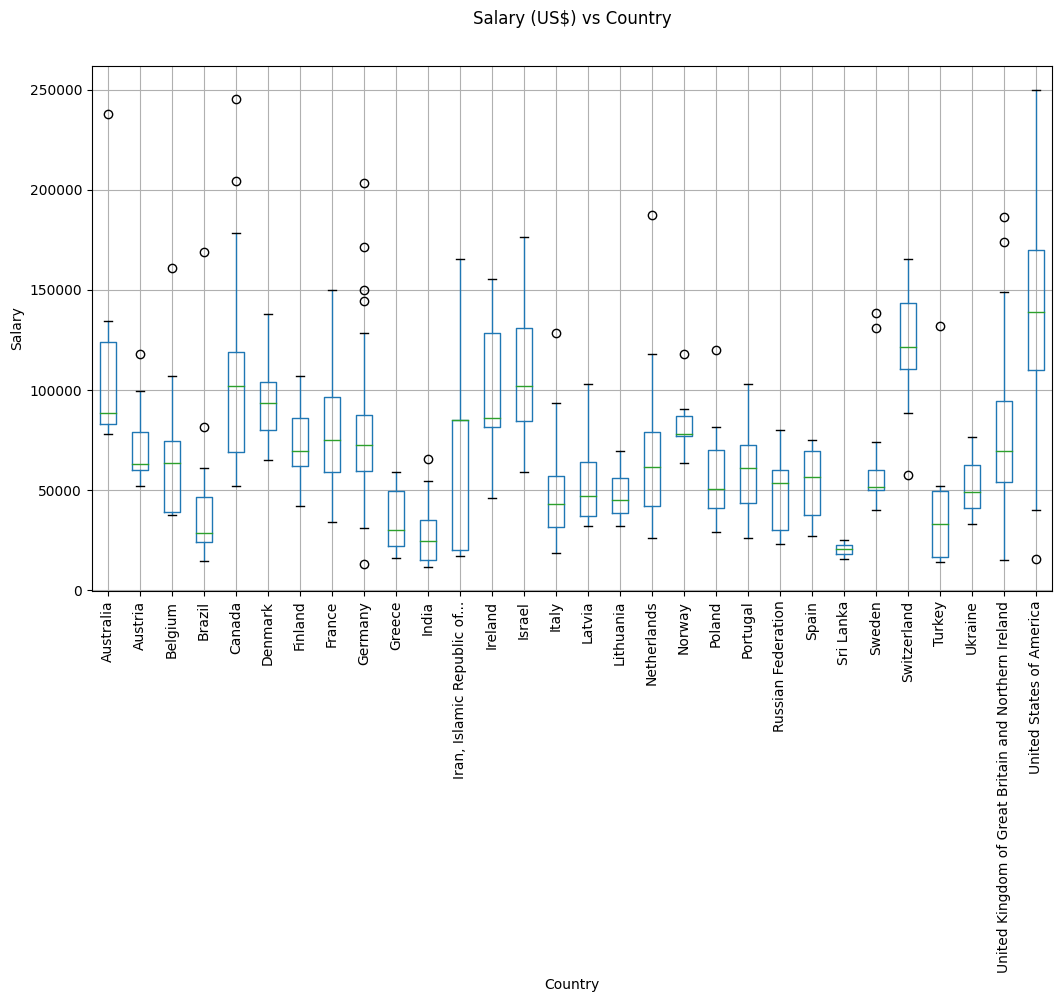

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [18]:
df ["YearsCodePro"].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '11', '24', '25', '12',
       '4', '20', '8', '18', '30', '27', '17', '43', '38', '33', '29',
       '22', '1', '40', '34', '42', '26', '31', '36', '39'], dtype=object)

In [20]:
def clean_experience (x):
  if x == 'More that 50 years' :
    return 50
  if x == 'Less than 1 year' :
    return 0.5
  return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [21]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [22]:
def clean_education(x) :
  if 'Bachelor’s degree' in x :
    return 'Bachelor’s degree'
  if 'Master’s degree' in x :
    return 'Master’s degree'
  if 'Professional degree' in x or 'Other doctoral' in x :
    return 'Post grad'
  return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)


In [23]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [25]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([29, 28,  6,  0, 17,  8, 24,  7, 22,  3, 20, 14,  4, 25, 16, 10, 15,
        1, 18, 21, 11,  2,  5, 26, 13, 27, 19, 12,  9, 23])

In [26]:
x = df.drop("Salary", axis=1)
y = df["Salary"]

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y.values)

LinearRegression()

In [28]:
y_pred = linear_reg.predict(x)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))

In [30]:
error

42727.33315102038

In [31]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [32]:
y_pred = dec_tree_reg.predict(x)

In [34]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$17,781.91


In [36]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [37]:
y_pred = random_forest_reg.predict(x)

In [38]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$21,008.90


In [40]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [41]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$21,008.90


In [42]:
x

,Country,EdLevel,YearsCodePro
2,29,0,23.0
3,29,0,7.0
5,28,1,21.0
6,29,1,3.0
7,29,0,3.0
...,...,...,...
1757,27,0,7.0
1763,4,0,27.0
1764,29,0,15.0
1769,29,0,8.0


In [45]:
x = np.array([["United States of America", "Master’s degree", 15 ]])
x

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [46]:
x[:, 0] = le_country.transform(x[:,0])
x[:, 1] = le_education.transform(x[:,1])
x = x.astype(float)
x

array([[29.,  2., 15.]])

In [47]:
y_pred = regressor.predict(x)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([155073.72826087])

In [48]:
import pickle

In [50]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
  pickle.dump(data, file)

In [51]:
with open('saved_steps.pkl', 'rb') as file:
  data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]


In [52]:
y_pred = regressor_loaded.predict(x)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([155073.72826087])